# Approximation of the Minions location base on the Logfile

## If first time you run this notebook

In [ ]:
!conda install -c conda-forge ipyleaflet
!pip install utm

In [ ]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager jupyter-leaflet

*Then restart jupyterlab or notebook*

## Importing functions

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as  mpl
from ipyleaflet import Map, WMSLayer, basemaps, Marker, MarkerCluster
import pandas as pd

## Defining local module to the path

In [2]:
src = os.path.abspath('./PyMod/')
if src not in sys.path:
    sys.path.append(src)

## Importing local modules

**Python module to extract temperature and location data :**

In [3]:
from LogExtract import nodes_gnss_temp

## Extracting data from LogFile from 1 file

In [9]:
path = "E:/PhD/Supervision/Martin/DATA/usquare_logfile/"
stt = '2023-11-13T09:40:00'
end = '2023-11-13T10:13:00'

In [8]:
TEMP, TEMPUTC, GNSSUTC, LAT, LONG, ALTI, COMPASS, TILT = nodes_gnss_temp(path, startdate=stt, enddate=end)

PermissionError: [Errno 13] Permission denied: 'E:/PhD/Supervision/Martin/DATA/usquare_logfile'

Text(0, 0.5, 'Latitude (m)')

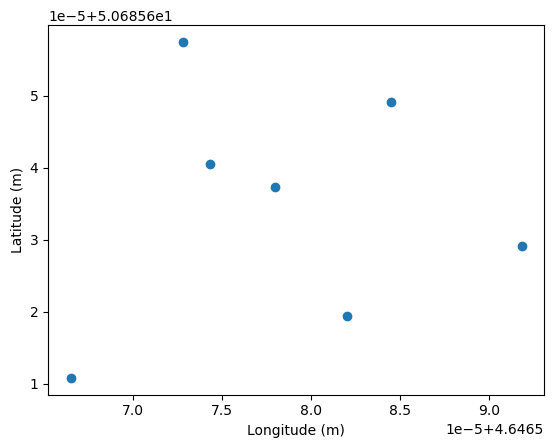

In [6]:
fig, ax = plt.subplots()
ax.scatter(LONG, LAT)
ax.set_xlabel('Longitude (m)')
ax.set_ylabel('Latitude (m)')

### Median position => Approximate the location of the geophones

In [7]:
approxPos = [np.median(LONG), np.median(LAT)]

Text(0, 0.5, 'Latitude (m)')

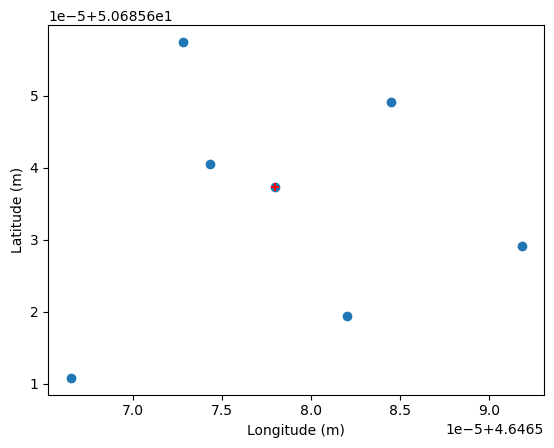

In [8]:
fig, ax = plt.subplots()
ax.scatter(LONG, LAT)
ax.scatter(approxPos[0],approxPos[1], c='r', marker='+')
ax.set_xlabel('Longitude (m)')
ax.set_ylabel('Latitude (m)')

### Showing on a map

In [9]:
m = Map(basemap=basemaps.CartoDB.Positron, center=(approxPos[1],approxPos[0]), zoom=15)

marker1 = Marker(location=(approxPos[1],approxPos[0]), draggable=False)
marker_cluster = MarkerCluster(markers=(marker1,))

m.add_layer(marker_cluster)

m

Map(center=[50.685637333, 4.646578], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

## For multiple geophones

In [18]:
base = "E:/PhD/Supervision/Martin/DATA/usquare_logfile/"
stt = '2023-11-13T10:21:00'
end = '2023-11-13T11:01:00'

In [19]:
dirLog = os.listdir(base)
dirLog

['453001250',
 '453003484',
 '453003625',
 '453004444',
 '453004465',
 '453004512',
 '453004639',
 '453004744',
 '453004823',
 '453013956',
 '453019524',
 '453020066',
 '590001596']

In [20]:
PosNodes = []

for nodes in dirLog :
    path = '%s/%s' %(base,nodes)
    for folder in os.listdir(path) :
        if folder.startswith('20231113') :
            path = '%s/%s/%s/DigiSolo.LOG' %(base,nodes,folder)
            TEMP, TEMPUTC, GNSSUTC, LAT, LONG, ALTI, COMPASS, TILT = nodes_gnss_temp(path, startdate=stt, enddate=end)
            MdLat = np.median(LAT)
            MdLong = np.median(LONG)
            MdNorth = np.median(COMPASS)
            PosNodes.append([nodes,MdLat, MdLong, MdNorth])

C:\Users\julie\anaconda3\envs\bas2\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\julie\anaconda3\envs\bas2\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [21]:
from ipyleaflet import Map, WMSLayer, basemaps, Marker, MarkerCluster

m = Map(basemap=basemaps.CartoDB.Positron, center=(approxPos[1],approxPos[0]), zoom=15)

markers = []

for pos in PosNodes :
    markers.append(Marker(location=(pos[1],pos[2]), draggable=False))

marker_cluster = MarkerCluster(markers=markers)

m.add_layer(marker_cluster)

m

NameError: name 'approxPos' is not defined

### Visualize the serial numbers and compass

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


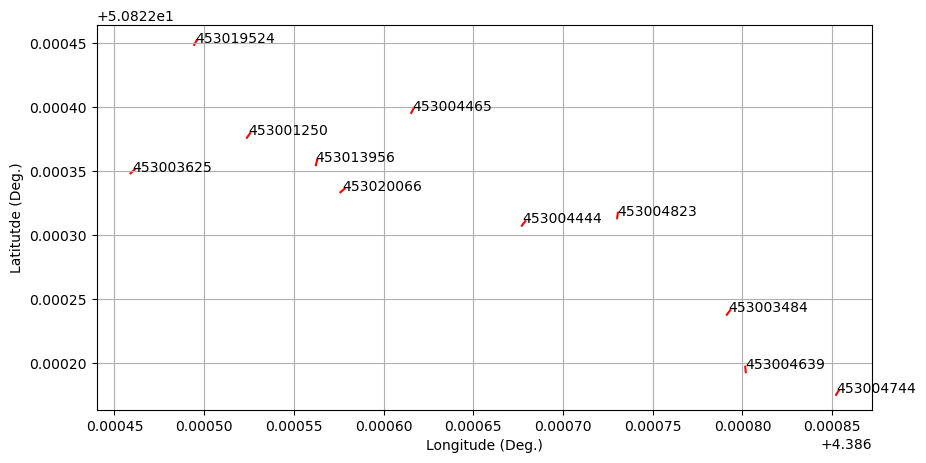

In [22]:
fig = plt.figure(figsize=(10,5))
for node in PosNodes :
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(-node[3])
    plt.scatter(node[2],node[1], c='r', marker=t, s=30)
    plt.text(node[2],node[1], node[0])
    
plt.xlabel('Longitude (Deg.)')
plt.ylabel('Latitutde (Deg.)')

plt.grid()

In [16]:
out = pd.DataFrame(PosNodes, columns=['SN', 'Y', 'X', 'Northing'])

In [17]:
out

,SN,Y,X,Northing
0,453001250,50.822379,4.386519,34.8915
1,453003484,50.822314,4.386881,37.3505
2,453003625,50.822339,4.386443,48.0755
3,453004444,50.822350,4.386738,41.2625
4,453004465,50.822404,4.386586,28.2990
5,453004512,50.822486,4.386770,11.6570
6,453004639,50.822193,4.386881,-4.7185
7,453004744,50.822237,4.386919,30.0365
8,453004823,50.822352,4.386793,3.9995
9,453013956,50.822517,4.386583,5.9625


In [20]:
out.to_csv('./PosNodes.csv')